# Name: Akshay Nivrutti Vanjare
## Gmail: https://www.akshayvanjare8@gmail.com 
## LinkedIn: https://www.linkedin.com/in/akshayvanjare
## GitHub: https://www.github.com/akshayvanjare8

# Task-4 Stock Market Prediction using Numerical and Textual Analysis

### Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib

mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib

style.use('ggplot')

In [3]:
!pip install pandas-datareader

     |████████████████████████████████| 107 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 28.3 MB/s eta 0:00:01


In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

### Pandas web data reader is an extension of pandas library to communicate with most updated Financial Data

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)

In [7]:
#Take a look at dataset

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.542150


In [8]:
#Take a look at dataset

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.877136
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,77.050926


### Rolling Mean (Moving Average) 
#### to determine trend
The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [9]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(10)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
Name: Adj Close, dtype: float64

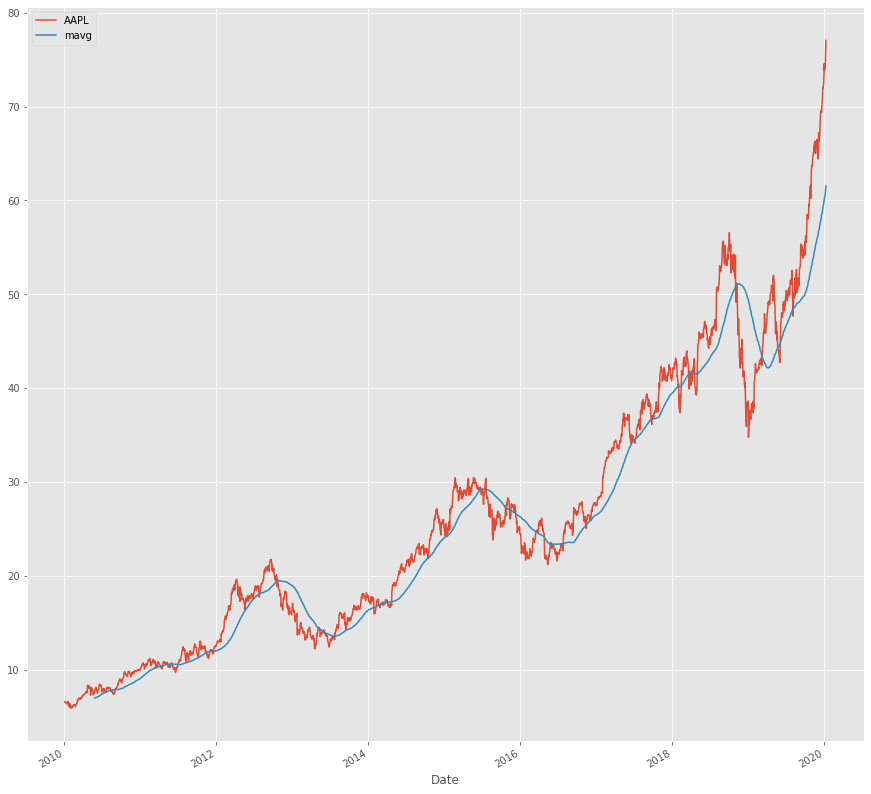

In [10]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stock and experiencing upturn.

### Return Deviation
#### to determine risk and return

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - investopedia

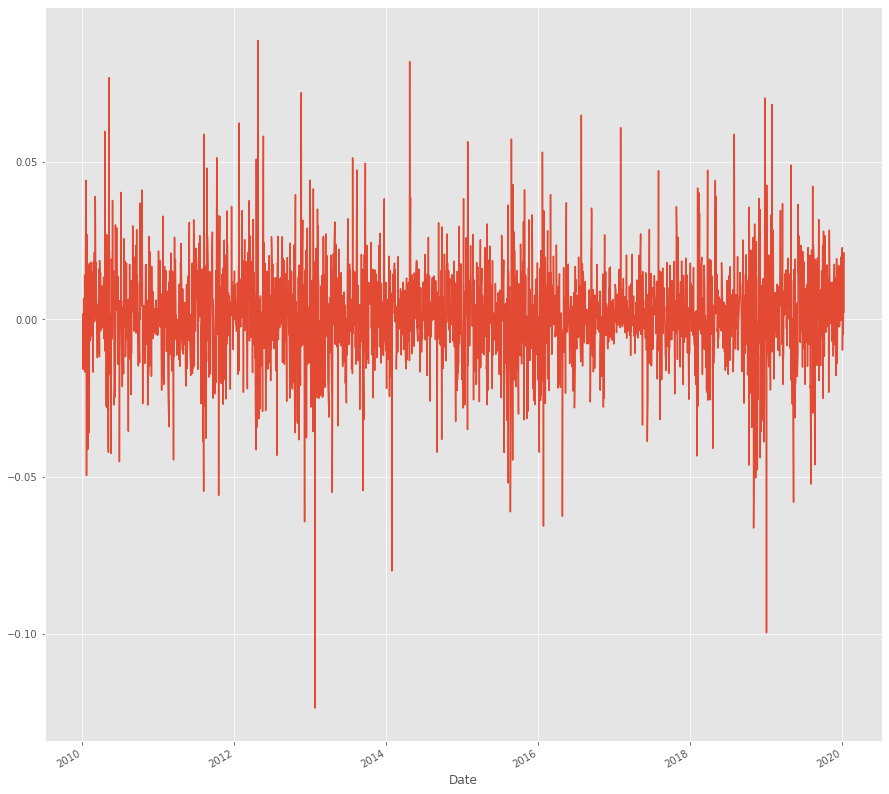

In [11]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

logically, our ideal stocks should return as high and stable as possible. if you are risk averse, you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of stocks and competitor analysis.

### Analysis Competitors Stocks

In this segment , we are going to analyse on how one company performs in relative with its competitors. Let'sassume we are intrested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [12]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,6.604801,10.715343,312.204773,93.500313,24.168472
2010-01-05,6.616219,10.770829,310.829926,92.370834,24.176279
2010-01-06,6.510980,10.715343,302.994293,91.770790,24.027906
2010-01-07,6.498945,11.270185,295.940735,91.453102,23.778025
2010-01-08,6.542150,11.512927,299.885956,92.370834,23.942017
2010-01-11,6.484439,11.623892,299.432648,91.403702,23.637472
2010-01-12,6.410679,11.630828,294.137512,92.130806,23.481291
2010-01-13,6.501104,11.672442,292.448822,91.933167,23.699940
2010-01-14,6.463451,11.582279,293.823669,93.401497,24.176279


### Correlation Analysis
#### Does one competitor afeect others?

We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks returns

In [13]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001848,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008821,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312
2010-01-14,-0.005792,-0.007724,0.004701,0.015972,0.020099


To prove the positive correlations, we will use heat map to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

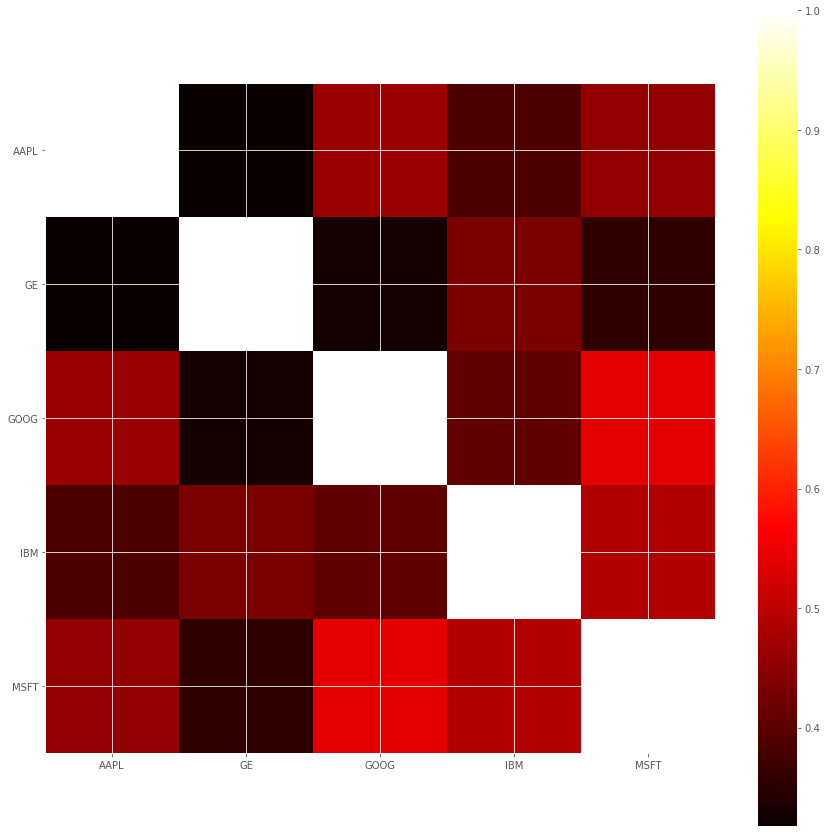

In [14]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the scatter matrix and heatmap, we can find great correlations among the competing stocks.However, this might not show causally, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

### Stocks Return Rate and Risk

Apart from correlation, we also analyse each stock's risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of raturns (Risk)

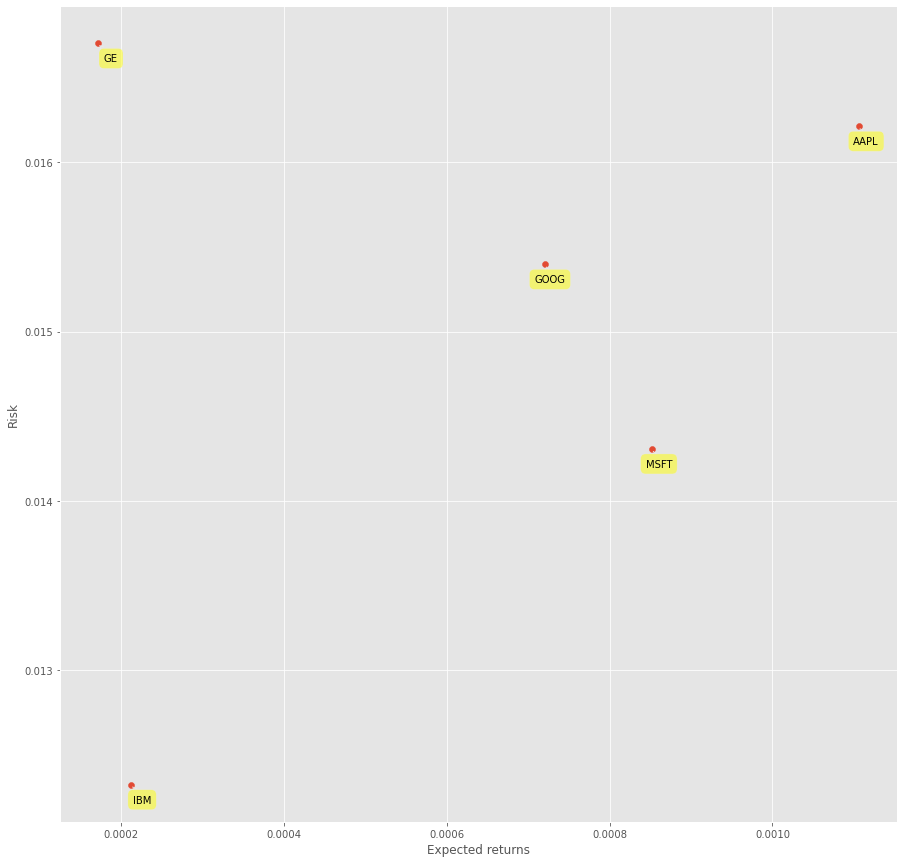

In [15]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'yellow',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

### India-News-Headlines file imported and doing Numerical Analysis

In [3]:
df1 = pd.read_csv("F:\india-news-headlines.csv")

In [4]:
#Take a look at dataset

df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [5]:
#Take a look at dataset

df1.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


### Data Exploration

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         int64
headline_category    object
headline_text        object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [7]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [8]:
df1.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [9]:
df1.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [10]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [11]:
#In case of null values

df1.isnull().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [12]:
df1.corr()

,publish_date
publish_date,1.0


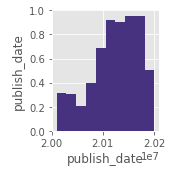

In [15]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [16]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                                                                98
Watch top news in one-minute                                                                          90
Official Site                                                                                         89
Football: Italian Serie A table                                                                       88
Football: Spanish La Liga table                                                                       86
Watch: Top news in one-minute                                                                         85
Intraday targets/key levels                                                                           81
Football: French Ligue 1 table                                                                        74
RBI-MONEY-MARKET-OPERATION                                                                            72
Column: Tongue in Check                                

In [17]:
df1['headline_category'].value_counts()

india                                                       285619
unknown                                                     207732
city.mumbai                                                 132649
city.delhi                                                  124658
business.india-business                                     115246
city.chandigarh                                             107464
city.hyderabad                                               99014
city.bengaluru                                               91857
entertainment.hindi.bollywood                                90374
city.ahmedabad                                               85813
city.pune                                                    84620
city.lucknow                                                 83591
city.kolkata                                                 81298
city.nagpur                                                  77300
city.goa                                                     7

### Exploratory Data Analysis using NLP and NLTK tools

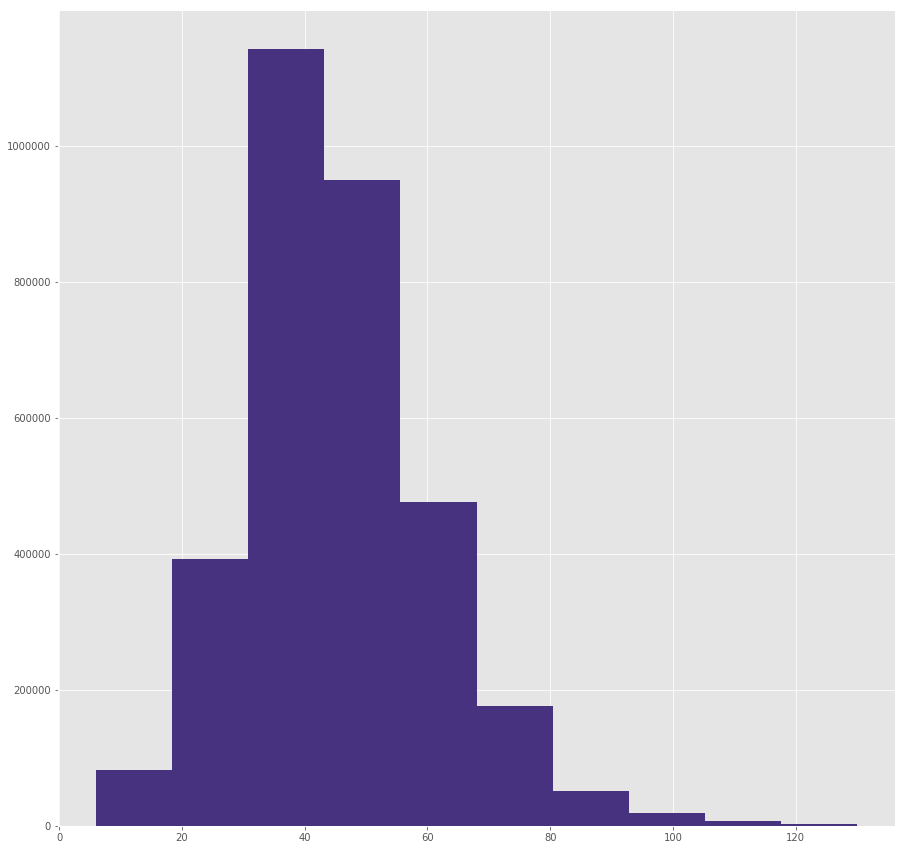

In [18]:
df1['headline_text'].str.len().hist()
plt.show()

This histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters. now, we will move on to data exploration at a word-level. let's plot the number of words appearing in each news headline.

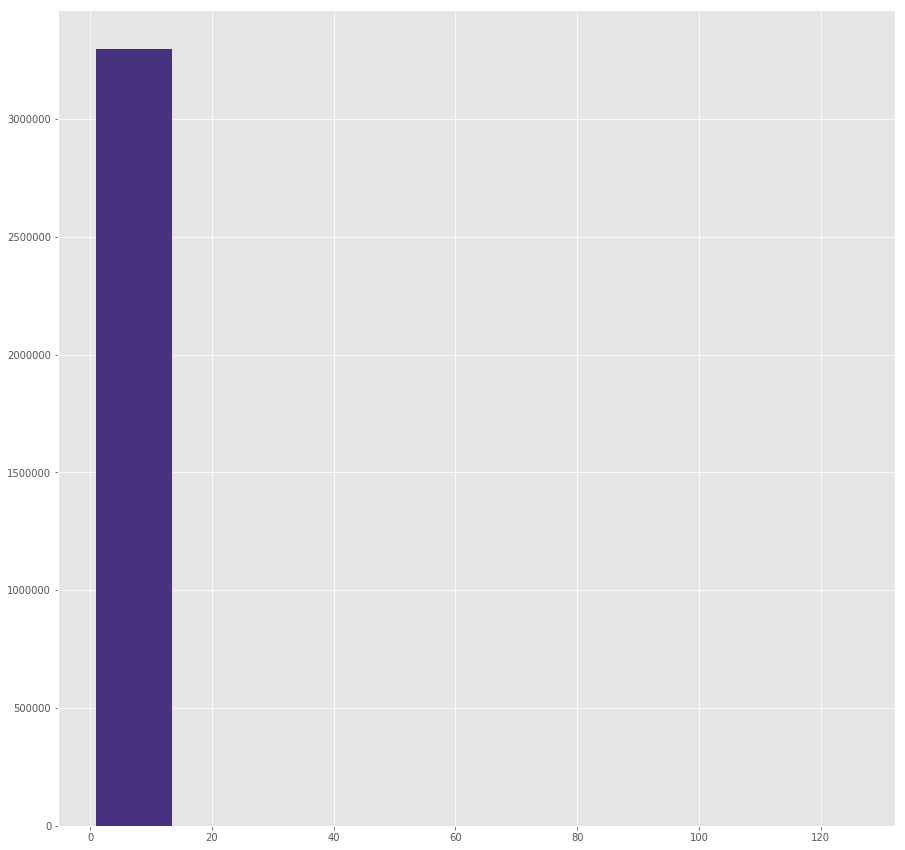

In [19]:
df1['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

The average word length ranges between 1 to 18 with 10 being the most common length. Does it mean that people are using really short words in news headlines?
Lets find out. One reason, why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as "the", "an", "a" etc. As these words probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data. To get the corpus containing stopwords you can use the #nltk library. Nltk contains stopwords from many languages, since we are only dealing with english news. I will filter the english stopwords from the corpus

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\akshay
[nltk_data]     jingar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [26]:
corpus = []
new = df1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [28]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

Now we know which stopwords occur frquently in our text, let's inspect which words other than these stopwords occur frequently. We will use the counter function from the collection library to count and store the occurrences of each word in a list of tupples. 

In [33]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

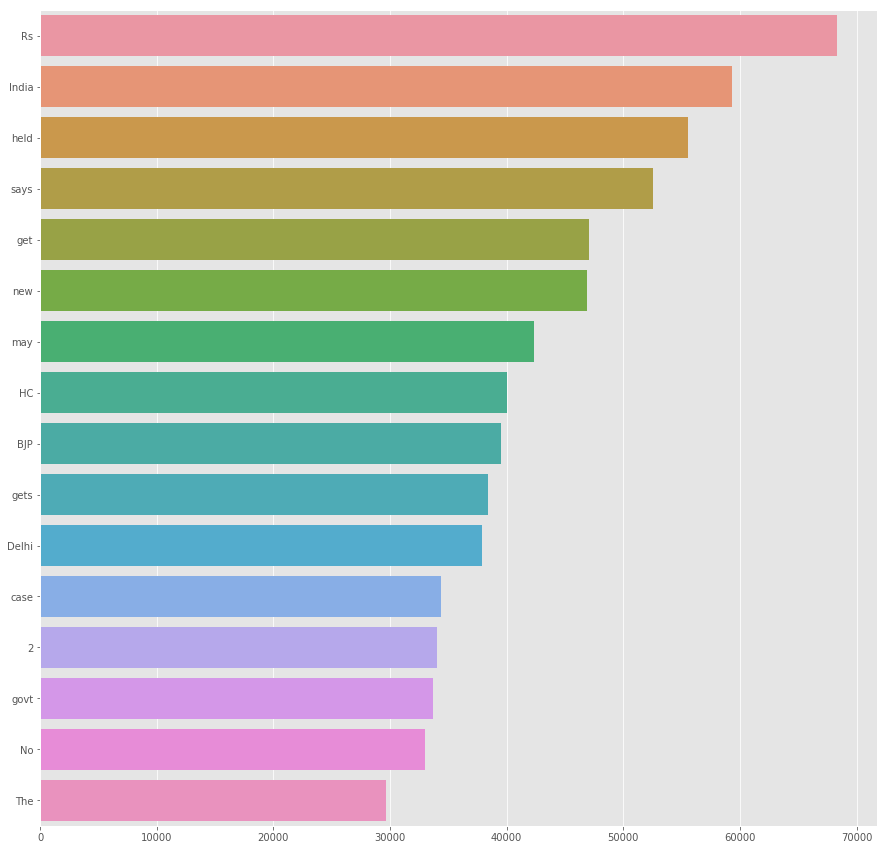

In [34]:
sns.barplot(x = y , y = x)
plt.show()

wow! the "Rs", "India" and "held" dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS - India

### Ngram Exploration

Ngram are simply contiguous sequences of n words. For example "riverbank", "The three muskedteers" etc. If the number of words is 2, It is called bigram. For 3 words it is called a trigram and so on.

In [35]:
from nltk.util import ngrams
list(ngrams(['I' , 'went', 'to', 'the', 'river', 'bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n , n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_frq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_feq = sorted(words_frq, key = lambda x : x[1], reverse = True)
    return words_frq[:10]

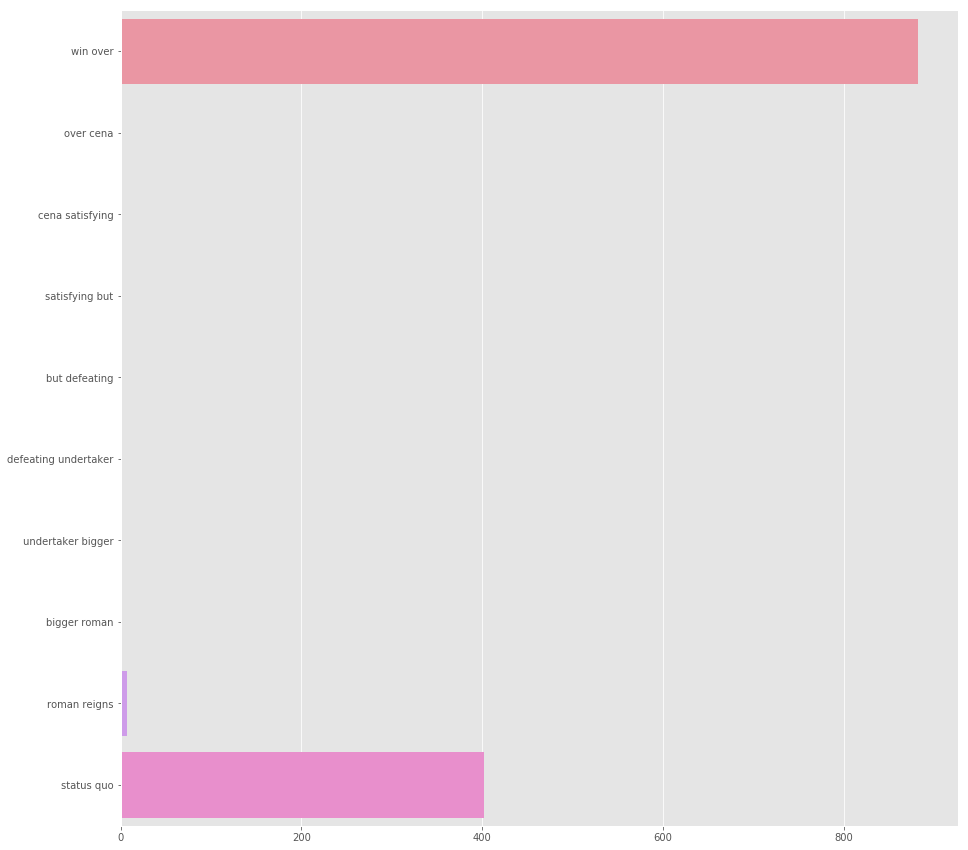

In [38]:
top_n_bigrams = get_top_ngram(df1['headline_text'], 2)[:10]
x,y = map(list, zip(*top_n_bigrams))
sns.barplot(x = y, y = x)
plt.show()

### Textblob

In [43]:
!pip install textblob

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/textblob/
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)")': /packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)")': /packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after 

In [44]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score'] = df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

In [ ]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
df1['polarity'] = df1['polarity_score'].\
   map(lambda x : sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

In [ ]:
df1[df1['polarity'] == 'positive']['headline_text'].head()

In [ ]:
df1[df1['polarity'] == 'negative']['headline_text'].head()